In [1]:
import numpy as np
import matplotlib.pyplot as plt

L=1      #Densidad de carga lineal [C/m]
Eo=8.854187817e-12 #Permitividad eléctrica del vacío 
l=5   #Longitud de la carga lineal
a=-l/2
b=l/2
N=1000
h=(b-a)/N


def Ey(y):   # Definimos la funcíon que calcula el valor de Ey
    
    def f(x):      # Definimos la funcíon a la cual se le calculará la integral
        return  y/((x**2+y**2)**(3/2))
    if y!=0:
        Fab=f(a)+f(b)    
    
        impar=0.0
        par=0.0
    
        for k in range(1,N,2):                 # Aplicamos el método de Simpson para calcular la integral de f(x)
            impar+=f(a+k*h)

        for k in range(2,N,2):
            par+=f(a+k*h)
        
        I=(L/(4*np.pi*Eo))*(h/3)*(Fab+4*impar+2*par)   
        
        return I
    
    else:
        return 0
#print(Ey(1))

def Ex(y): # Definimos la funcíon que calcula el valor de Ex
    
    if y!=0:
        def g(t):
            return t/((t**2+y**2)**(3/2))
        imp=0.0
        pr=0.0
        Fab1=g(a)+g(b)
        for k in range(1,N,2):                 # Aplicamos el método de Simpson para calcular la integral de f(t)
            imp+=g(a+k*h)

        for k in range(2,N,2):
            pr+=g(a+k*h)
            
        I=(L/(4*np.pi*Eo))*(h/3)*(Fab1+4*imp+2*pr)  
        return I
    else:
        return 0

#print(Ex(1))

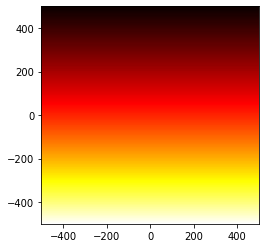

In [2]:
s=np.arange(-500,500, 0.1)      
m=np.arange(-500,500, 0.1)      
X=np.zeros(1000)
Y=np.zeros(1000)
for i in range(1000):
    X[i]=Ex(s[i])
    Y[i]=Ey(m[i])

XX, YY= np.meshgrid(X,Y) 

r=np.sqrt(XX**2+YY**2)

plt.hot()
plt.imshow(r,extent=(-500,500,-500,500)) 